<a href="https://colab.research.google.com/github/mogesTesema/Machine-Learning-Mastery-With-TensorFlow/blob/main/07_food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 1: Food Vision Big


In [103]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-cd95168b-0d83-df20-6788-a017723911a9)


In [104]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-10-24 07:58:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-10-24 07:58:39 (88.5 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



In [105]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys

In [106]:
import tensorflow_datasets as tfds

In [107]:
(train_data,test_data),ds_info = tfds.load(name="food101",
                                          split=["train","validation"],
                                            shuffle_files=True,
                                           as_supervised=True,
                                           with_info=True
                                          )

In [108]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [109]:
class_names = ds_info.features["label"].names


In [110]:
# Take on sample of train data
train_one_sample = train_data.take(1)


In [111]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [112]:
for image,label in train_one_sample:
    print(f"""
    Image shapes: {image.shape}
    Image datatype: {image.dtype}
    Target class from Food101 (tensor form): {label}
    Class name (str form): {class_names[label.numpy()]}
    """)


    Image shapes: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>
    Target class from Food101 (tensor form): 16
    Class name (str form): cheesecake
    


In [113]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 85,  84,  92],
        [ 86,  85,  93],
        [ 93,  92, 100],
        ...,
        [120, 196, 245],
        [120, 198, 246],
        [121, 199, 247]],

       [[ 88,  88,  96],
        [ 82,  82,  90],
        [ 88,  88,  96],
        ...,
        [116, 192, 244],
        [118, 195, 249],
        [119, 196, 248]],

       [[ 77,  80,  89],
        [ 75,  78,  87],
        [ 82,  86,  95],
        ...,
        [115, 189, 252],
        [117, 192, 255],
        [118, 194, 255]],

       ...,

       [[159, 166, 194],
        [154, 161, 187],
        [171, 178, 204],
        ...,
        [219, 216, 235],
        [223, 220, 239],
        [227, 226, 244]],

       [[170, 179, 208],
        [169, 179, 206],
        [173, 183, 210],
        ...,
        [218, 217, 235],
        [223, 222, 240],
        [226, 227, 245]],

       [[168, 177, 206],
        [170, 179, 208],
        [152, 162, 189],
        ...,
        [224, 223, 24

In [114]:
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

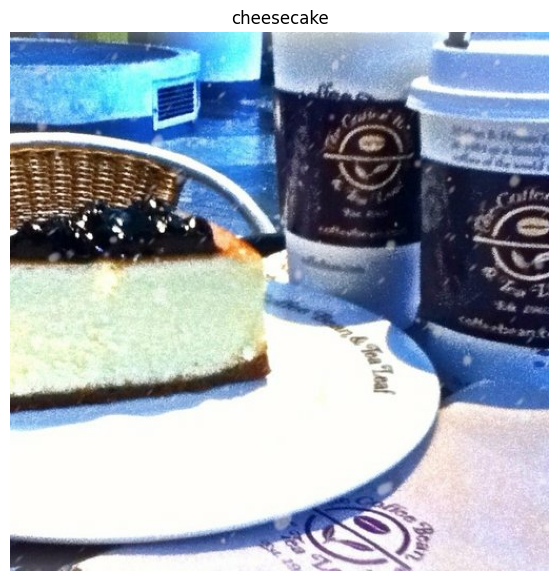

In [115]:
# plot an image
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [116]:
def preprocess_img(image,label,img_shape=224):
    """
    converts image datatype form 'uint8' -> 'float32' and reshpaes
    image to [img_shape,img_shape,color_channel]
    """
    image = tf.image.resize(image,[img_shape,img_shape])
    return tf.cast(image,tf.float32),label

In [117]:
preprocessed_image = preprocess_img(image,label)[0]
print(f"Image before preprocessing:\n {image[:2]}.. \nshape:{image.shape},\ndatatype: {image.dtype}")
print(f"iamge after preprocessing:\n{preprocessed_image[:2]}...\nshape:{preprocessed_image.shape}\ndatatype:{preprocessed_image.dtype} ")

Image before preprocessing:
 [[[ 85  84  92]
  [ 86  85  93]
  [ 93  92 100]
  ...
  [120 196 245]
  [120 198 246]
  [121 199 247]]

 [[ 88  88  96]
  [ 82  82  90]
  [ 88  88  96]
  ...
  [116 192 244]
  [118 195 249]
  [119 196 248]]].. 
shape:(512, 512, 3),
datatype: <dtype: 'uint8'>
iamge after preprocessing:
[[[ 84.67857   84.321434  92.321434]
  [ 87.19898   86.841835  94.841835]
  [ 84.72959   84.581635  94.72449 ]
  ...
  [119.50503  194.93877  245.85202 ]
  [114.974525 190.97452  241.90309 ]
  [119.071465 196.4286   247.82652 ]]

 [[ 75.647964  84.21939   93.21939 ]
  [ 71.45407   80.959175  89.959175]
  [ 78.03061   87.20408   97.47449 ]
  ...
  [113.31632  182.62755  249.35715 ]
  [106.57655  176.86227  245.4337  ]
  [108.601944 179.9796   248.16833 ]]]...
shape:(224, 224, 3)
datatype:<dtype: 'float32'> 


In [118]:
# batch and prepare datasets
train_data = train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)


In [119]:
train_data

<_ParallelMapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [120]:
# shuffle training data and turn it into batchs and prefetch it(load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
# map preprocessing functions to test data
test_data = test_data.map(preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
# batch and prefetch
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [121]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [122]:
# Create modelling callbacks
checkpoint_path = "model_checkpoints/ckpt/checkpoint.weights.h5"
model_checkpoints = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       monitor="val_acc",
                                                       save_best_only=True,
                                                       save_weights_only=True,
                                                       verbose=0)



In [123]:
# setup mixed precisoin training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")


In [124]:
# Build feature extraction model
from tensorflow.keras import layers

# Create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
# Create functional model
inputs = layers.Input(shape=input_shape,name="input_layer")
x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D(name="Pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32,name="output_layer_float32")(x)
model = tf.keras.Model(inputs,outputs)



In [125]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [126]:
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

In [127]:
for index,layer in enumerate(model.layers):
  print(index,layer.name,layer.dtype,layer.trainable,layer.dtype_policy)

0 input_layer float32 True <DTypePolicy "mixed_float16">
1 efficientnetb0 float32 False <DTypePolicy "mixed_float16">
2 Pooling_layer float32 True <DTypePolicy "mixed_float16">
3 dense_10 float32 True <DTypePolicy "mixed_float16">
4 output_layer_float32 float32 True <DTypePolicy "float32">


In [134]:
initial_epoch = 3
history_101_food_classes_feature_exract = model.fit(train_data,
          epochs=initial_epoch,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=int(0.15*len(test_data)),
          callbacks=[create_tensorboard_callback("training_logs","efficientNet_101_feature_extract"),model_checkpoints])

Saving TensorBoard log files to: training_logs/efficientNet_101_feature_extract/20251024-082252
Epoch 1/3
2366/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7263 - loss: 1.0375

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 164s 68ms/step - accuracy: 0.7263 - loss: 1.0375 - val_accuracy: 0.7341 - val_loss: 0.9865
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 154s 64ms/step - accuracy: 0.7445 - loss: 0.9719 - val_accuracy: 0.7373 - val_loss: 0.9607
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 160s 67ms/step - accuracy: 0.7512 - loss: 0.9283 - val_accuracy: 0.7360 - val_loss: 0.9712


In [135]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.7328 - loss: 0.9768


In [ ]:
results_feature_extract_model

In [129]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_float32            │ (None, 101)            │             0 │
│ (Activation)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,437,720 (16.93 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 258,768 (1010.82 KB)

In [ ]:
model.save("food_vision_model.keras")